In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly as py
from configs import census_api
from us_state_abbrev import states

In [3]:
#import data from extracted sources

df_Census = pd.read_csv('data/census_df.csv')
df_Crime = pd.read_csv('data/Crime_Results.csv')
df_location = pd.read_csv('data/crime_location.csv')
years = ['2014','2015','2016','2017']
columns = ['index', '2014','2015','2016','2017']


df_Crime.head()


,index,state,2014,2015,2016,2017,avg,delta,Abs,text
0,SD,South Dakota,72.0,103.0,144.0,199.0,129.50,176.388889,176.388889,176.39%
1,AK,Alaska,146.0,380.0,445.0,317.0,322.00,117.123288,117.123288,117.12%
2,MA,Massachusetts,968.0,1338.0,1544.0,1761.0,1402.75,81.921488,81.921488,81.92%
3,MN,Minnesota,450.0,410.0,468.0,759.0,521.75,68.666667,68.666667,68.67%
4,IL,Illinois,3095.0,3456.0,5055.0,5089.0,4173.75,64.426494,64.426494,64.43%


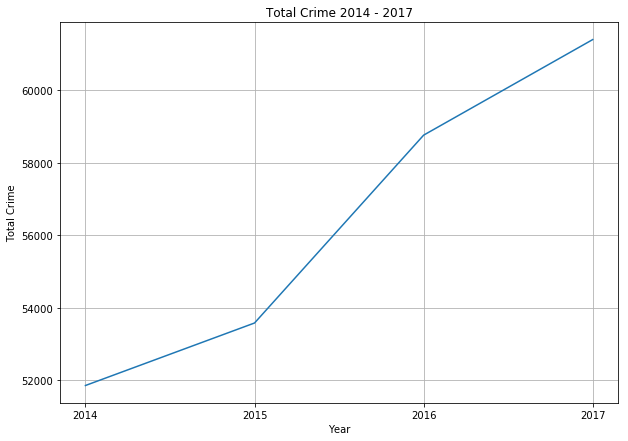

In [4]:
df_CrimeYears = df_Crime[columns].set_index('index').T.reset_index()
df_CrimeYears['total'] = df_CrimeYears.sum(axis = 1)
df_CrimeYears.head()

x = df_CrimeYears['index']
y = df_CrimeYears['total']

plt.figure(figsize=(10,7))
plt.plot(x,y )
plt.title('Total Crime 2014 - 2017')
plt.xlabel('Year')
plt.xticks(range(2014, 2018, 1), years)
plt.ylabel('Total Crime')
plt.grid()
plt.savefig('Total Crime over Time.png')
plt.show()#


In [5]:

states = df_Crime['state']
color = ['r','b','g','y']
trendcolor = ['r--','b--','g--','y--']

df_Scat = df_Crime.merge(df_Census,how = 'left', left_on = 'state', right_on = 'State')
df_Scat.head()

,index,state,2014,2015,2016,2017,avg,delta,Abs,text,State,State Number,2013 Population,2014 Population,2015 Population,2016 Population,2017 Population
0,SD,South Dakota,72.0,103.0,144.0,199.0,129.50,176.388889,176.388889,176.39%,South Dakota,46.0,825198.0,834708.0,843190.0,851058.0,861542.0
1,AK,Alaska,146.0,380.0,445.0,317.0,322.00,117.123288,117.123288,117.12%,Alaska,2.0,720316.0,728300.0,733375.0,736855.0,741522.0
2,MA,Massachusetts,968.0,1338.0,1544.0,1761.0,1402.75,81.921488,81.921488,81.92%,Massachusetts,25.0,6605058.0,6657291.0,6705586.0,6742143.0,6823721.0
3,MN,Minnesota,450.0,410.0,468.0,759.0,521.75,68.666667,68.666667,68.67%,Minnesota,27.0,5347740.0,5383661.0,5419171.0,5450868.0,5525050.0
4,IL,Illinois,3095.0,3456.0,5055.0,5089.0,4173.75,64.426494,64.426494,64.43%,Illinois,17.0,12848554.0,12868747.0,12873761.0,12851684.0,12835726.0


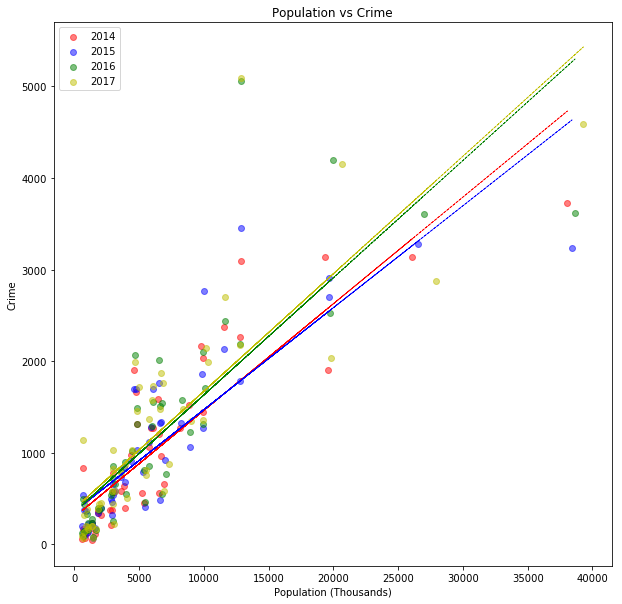

In [178]:



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

for year in years:
    y = df_Scat[year].values
    x = df_Scat[f'{year} Population'].values/1000
    #print(f'{year},{x},{y}')
    #print(x)
    #print(y)
    ax.scatter(x, y , c = color[years.index(year)], alpha = 0.5,label = year)
    # calc the trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),color[years.index(year)], linewidth =.75, linestyle='dashed')
ax.legend()
plt.title("Population vs Crime")
plt.xlabel("Population (Thousands)")
plt.ylabel("Crime")
plt.savefig('Population vs Crime.png')
plt.show()
#plt.figure(figsize=(5,10))


In [296]:


scl = [[0.0, '#007F00'],[0.25,'#F5F5F5'],[0.75,'#ffb9b9'],[1.0,'#C21807']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_Crime['index'],
        z = df_Crime['delta'].astype(int),
        locationmode = 'USA-states',
        text = df_Crime['text'],
        hoverinfo = 'text+location',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Percentage")
        ) ]

layout = dict(
        title = '2014 - 2017 Change in Gun Crime Rate',
    
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.io.write_image(fig, 'images/Gun Crime Change.png')
py.plotly.iplot( fig, filename='2014 - 2017 Change in Gun Crime Rate' )

In [298]:
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_location['longitude'],
        lat = df_location['latitude'],
        #text = df['text'],
        mode = 'markers',
        marker = dict(
            size = 2,
            opacity = 0.2,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=.25,
                color='rgba(102, 102, 102)'
            ),
            #colorscale = scl,
            #cmin = 0,
            #color = df['cnt'],
            #cmax = df['cnt'].max(),
            
        ))]

layout = dict(
        title = '2017 Gun Crimes by Location',
        
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.io.write_image(fig, '2017 Gun Crimes by Location.png')
py.plotly.iplot( fig, validate=False, filename='2017 Gun Crimes by Location' )